In [21]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split


#
import warnings
warnings.filterwarnings('ignore')
#
%matplotlib inline
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 143)

# Loading

In [2]:
import pandas as pd
# Loading train data 
df_init = pd.read_csv('/content/train.csv')
df_init_test = pd.read_csv('/content/test.csv')
#
df=df_init.copy()
df_test=df_init_test.copy()
# Top 5 records
df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
# Reinit function
def reinit_input_df():
  l_df=df_init.copy()
  l_df_test=df_init_test.copy()
  return l_df

In [4]:
df.shape

(9557, 143)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [6]:
len(df.columns),len(df_test.columns)

(143, 142)

In [7]:
# The difference betwween the columns of train.csv and test?csv is 'Target' column
[col for col in df.columns if col not in df_test.columns]


['Target']

# Types

In [8]:
df.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

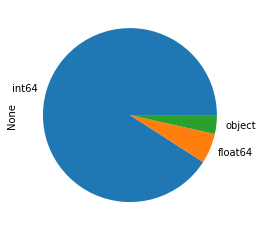

In [9]:
df.dtypes.value_counts().plot.pie()

In [10]:
df.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [11]:
# list of columns with count of its values by type of columns
def get_value_counts(i_df,i_type):
  lst_nbre_val_col=[]
  cmpt=0
  for col in i_df.select_dtypes(i_type).columns:
    cmpt=i_df[col].value_counts().count()
    lst_nbre_val_col.append((col,cmpt))
  #
  return lst_nbre_val_col

In [12]:
get_value_counts(df,'object')

[('Id', 9557),
 ('idhogar', 2988),
 ('dependency', 31),
 ('edjefe', 22),
 ('edjefa', 22)]

In [13]:
df['Id'].head(),df['idhogar'].head()

(0    ID_279628684
 1    ID_f29eb3ddd
 2    ID_68de51c94
 3    ID_d671db89c
 4    ID_d56d6f5f5
 Name: Id, dtype: object, 0    21eb7fcc1
 1    0e5d7a658
 2    2c7317ea8
 3    2b58d945f
 4    2b58d945f
 Name: idhogar, dtype: object)

In [ ]:
df['dependency'].value_counts(),df['edjefe'].value_counts(),df['edjefa'].value_counts()

In [15]:
# return list of values of column and list of no numeric values
def get_values_of_column(i_df,i_col):
  X=i_df[i_col]
  ll=X.unique()
  lst_no_num=[]
  #print(ll)
  for i in ll:
    try:
      float(i)
    except:
      lst_no_num.append(i)
  #
  return (ll,lst_no_num)  

In [16]:
# list of no numeric values
def get_lst_no_num(i_df,i_col):
  l_lst_values, l_lst_no_num=get_values_of_column(i_df,i_col)
  return l_lst_no_num

In [18]:
get_values_of_column(df,'edjefe')

(array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
        '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
       dtype=object), ['no', 'yes'])

In [19]:
get_values_of_column(df,'edjefa')

(array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
        '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
       dtype=object), ['no', 'yes'])

In [20]:
get_values_of_column(df,'dependency')

(array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
        '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
        '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
        '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
        '.16666667', '.60000002'], dtype=object), ['no', 'yes'])

In [17]:
print('dependency-->',get_lst_no_num(df,'dependency'))
print('edjefe-->',get_lst_no_num(df,'edjefe'))
print('edjefa-->',get_lst_no_num(df,'edjefa'))

dependency--> ['no', 'yes']
edjefe--> ['no', 'yes']
edjefa--> ['no', 'yes']


In [18]:
# type= float64
lst_t=get_value_counts(df,'float64')
lst_t[:6]

[('v2a1', 157),
 ('v18q1', 6),
 ('rez_esc', 6),
 ('meaneduc', 155),
 ('overcrowding', 38),
 ('SQBovercrowding', 38)]

In [19]:
# type= float64
lst_t=get_value_counts(df,'float64')
[i for i in lst_t if i[1] > 10]

[('v2a1', 157),
 ('meaneduc', 155),
 ('overcrowding', 38),
 ('SQBovercrowding', 38),
 ('SQBdependency', 31),
 ('SQBmeaned', 155)]

In [20]:
# Type= int64
lst_t=get_value_counts(df,'int64')
lst_t[:6]

[('hacdor', 2),
 ('rooms', 11),
 ('hacapo', 2),
 ('v14a', 2),
 ('refrig', 2),
 ('v18q', 2)]

In [21]:
# type= int64
lst_t=get_value_counts(df,'int64')
[i for i in lst_t if i[1] > 10]

[('rooms', 11),
 ('r4t2', 11),
 ('r4t3', 13),
 ('tamhog', 13),
 ('tamviv', 14),
 ('escolari', 22),
 ('hhsize', 13),
 ('hogar_total', 13),
 ('qmobilephone', 11),
 ('age', 97),
 ('SQBescolari', 22),
 ('SQBage', 97),
 ('SQBhogar_total', 13),
 ('SQBedjefe', 22),
 ('agesq', 97)]

# Bias

In [22]:
df.shape

(9557, 143)

In [23]:
df.groupby('Target')['Target'].sum()

Target
1      755
2     3194
3     3627
4    23984
Name: Target, dtype: int64

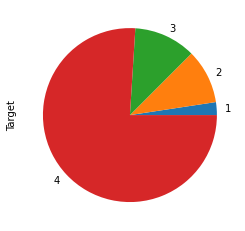

In [24]:
df.groupby('Target')['Target'].sum().plot.pie()

# Bonus

In [20]:
#Bonus======================================================================================
null_counts_float64=df.select_dtypes('float64').isnull().sum()
null_counts_float64[null_counts_float64 > 0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [ ]:
df.select_dtypes('object').columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [375]:
X = df[df['v2a1'].isnull()]
#X = df[df['v2a1']==0]

columns=['v2a1','tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
X[columns]['tipovivi1'].unique()

array([0])

In [ ]:
columns=['v2a1','tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
X = df[df['tipovivi1']==0]
X[columns]['v2a1'].unique()

In [370]:
  df.loc[df['tipovivi1']==1,'v2a1']=0
  #df['v2a1'].replace([np.nan], df['v2a1'].median(), inplace=True)

In [ ]:
df[df['tipovivi1']==1]['v2a1'].value_counts()

Series([], Name: v2a1, dtype: int64)

In [ ]:
X = df[df['v2a1'].isna()]

columns=['v2a1','tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
X[columns]['tipovivi1'].value_counts()

1    5911
0     949
Name: tipovivi1, dtype: int64

In [ ]:
data = df[df['v2a1'].isnull()].head()
X=data[columns]
X

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


In [241]:
data = df[df['v2a1'].isnull()]
X=data[df.columns]
for col in ['tipovivi1',	'tipovivi2',	'tipovivi3',	'tipovivi4'	,'tipovivi5']:
 print(col, '   ', X[col].unique())

tipovivi1     [1 0]
tipovivi2     [0]
tipovivi3     [0]
tipovivi4     [0 1]
tipovivi5     [0 1]


In [ ]:
X['tipovivi4'].value_counts()

0    786
1    163
Name: tipovivi4, dtype: int64

In [ ]:
data2 = df[df['tipovivi1']==1]
X2=data2[X.columns]
X2.head()

,v2a1,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,NaN,1,0,0,0,0
13,NaN,1,0,0,0,0
14,NaN,1,0,0,0,0
26,NaN,1,0,0,0,0
32,NaN,1,0,0,0,0


In [ ]:
X2['tipovivi1'].value_counts()

1    5911
Name: tipovivi1, dtype: int64

In [ ]:
for col in ['v2a1','tipovivi1',	'tipovivi2',	'tipovivi3',	'tipovivi4'	,'tipovivi5']:
 print(col, '   ', X2[col].unique())

v2a1     [nan]
tipovivi1     [1]
tipovivi2     [0]
tipovivi3     [0]
tipovivi4     [0]
tipovivi5     [0]


In [ ]:
# donc v2a1=0

In [ ]:
data3 = df[df['tipovivi2']==0][df['tipovivi3']==0][df['tipovivi4']==0][df['tipovivi5']==0]
X3=data3[columns]
X3.head()

,v2a1,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,NaN,1,0,0,0,0
13,NaN,1,0,0,0,0
14,NaN,1,0,0,0,0
26,NaN,1,0,0,0,0
32,NaN,1,0,0,0,0


In [ ]:
for col in ['v2a1','tipovivi1',	'tipovivi2',	'tipovivi3',	'tipovivi4'	,'tipovivi5']:
 print(col, '   ', X3[col].unique())

v2a1     [nan]
tipovivi1     [1]
tipovivi2     [0]
tipovivi3     [0]
tipovivi4     [0]
tipovivi5     [0]


In [ ]:
X=df[['v2a1','tipovivi1',	'tipovivi2',	'tipovivi3',	'tipovivi4'	,'tipovivi5']]
X=X[X['v2a1'].isna()]
X.shape

(6860, 6)

In [242]:
X=df[['v2a1','tipovivi1',	'tipovivi2',	'tipovivi3',	'tipovivi4'	,'tipovivi5','Target']]
X=X[X['v2a1'].isna()]
ll=[]
for col in X.columns:
  ll.append((col,X[col].unique()))
ll

[('v2a1', array([nan])),
 ('tipovivi1', array([1, 0])),
 ('tipovivi2', array([0])),
 ('tipovivi3', array([0])),
 ('tipovivi4', array([0, 1])),
 ('tipovivi5', array([0, 1])),
 ('Target', array([4, 2, 3, 1]))]

In [ ]:
X=X[X['tipovivi1']==0]
ll=[]
for col in X.columns:
  ll.append((col,X[col].unique()))
ll

[('v2a1', array([nan])),
 ('tipovivi1', array([0])),
 ('tipovivi2', array([0])),
 ('tipovivi3', array([0])),
 ('tipovivi4', array([0, 1])),
 ('tipovivi5', array([1, 0]))]

In [ ]:
#resultat = maTable.groupby('animal')['ID'].nunique()

In [ ]:
df.shape

(9557, 143)

In [ ]:
===========================================rez_esc============================================

In [ ]:
data = df[df['rez_esc'].isnull()]
columns=['rez_esc','area2','age','edjefa']
X=data[columns]
X

,rez_esc,area2,age,edjefa
0,NaN,0,43,no
1,NaN,0,67,no
2,NaN,0,92,11
4,NaN,0,37,no
5,NaN,0,38,no
...,...,...,...,...
9552,NaN,1,46,no
9553,NaN,1,2,no
9554,NaN,1,50,no
9555,NaN,1,26,no


In [ ]:
for col in columns:
 print(col, '   ', X[col].unique())

rez_esc     [nan]
area2     [0 1]
lugar2     [0 1]
edjefa     ['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']


In [ ]:
X['age'].value_counts()

In [ ]:
df[df['age']>17]['rez_esc'].value_counts()  # age > 17 ==> rez_esc==nan

Series([], Name: rez_esc, dtype: int64)

In [ ]:
df[df['age']<7]['rez_esc'].value_counts()  # age < 7 ==> rez_esc==nan

Series([], Name: rez_esc, dtype: int64)

In [ ]:
Z=df.loc[(df['rez_esc'].isnull() & ((df['age'] > 7) & (df['age'] < 11)))]['age']
Z

2514    10
Name: age, dtype: int64

In [ ]:
df[df['age']==10]['rez_esc'].value_counts() 

0.0    116
1.0     20
3.0      1
Name: rez_esc, dtype: int64

In [ ]:
X=df[df['age']==10]  # len=138
len(X)

138

In [ ]:
Y=X[X['instlevel1']==1]
len(Y)

2

In [ ]:
Y['rez_esc']

2514    NaN
9347    3.0
Name: rez_esc, dtype: float64

In [ ]:
X['area2'].value_counts() 

0    91
1    47
Name: area2, dtype: int64

In [ ]:
df.index

RangeIndex(start=0, stop=9557, step=1)

In [ ]:
df.loc[2514:2514,:]['rez_esc']

2514   NaN
Name: rez_esc, dtype: float64

In [ ]:
df.loc[2514:2514,:]   # instlevel1, =1 no level of education

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,1,1,1,1,2,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0369a5d78,1,2,0,3,.5,11,no,13.5,1,0,0,0,0,0,0,0,0,2,1.5,0,1,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,10,0,100,9,121,1,2.25,0.25,182.25,100,4


In [ ]:
df=df_init.copy()
df.shape

(9557, 143)

In [ ]:
X=df[['idhogar','v18q1','v18q']]
X=X[X['v18q1'].isna()]
X['v18q'].unique()

array([0])

In [ ]:
X=df[['idhogar','v18q1','v18q']]
X=X[X['v18q1']==0]
X['v18q'].unique()

array([], dtype=int64)

In [ ]:
X=df[['idhogar','v18q1','v18q']]
X=X[X['v18q']==0]
X['v18q1'].unique()

array([nan])

In [ ]:
X=df[['idhogar','v18q1','v18q']]
X=X[X['v18q']!=0]
X['v18q1'].unique()

array([1., 2., 3., 4., 5., 6.])

In [ ]:
df['v18q1'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.])

In [ ]:
df['v18q'].unique()

array([0, 1])

In [ ]:
df.groupby(['Id','idhogar'])['v18q1'].sum().sort_values(ascending=False)

In [ ]:
df.groupby(['Id','idhogar'])['v18q1'].sum().sort_values(ascending=False).value_counts()

0.0    7342
1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

In [ ]:
df['idhogar']

In [ ]:
def get_v18q1_by_idhogar(df,i_idhogar):
  X=df.groupby('idhogar')['v18q1'].value_counts()
  return [i[1] for i in X.index if i[0]==i_idhogar][0]

In [ ]:
get_v18q1_by_idhogar(df,'e23e4e82d')

6.0

In [ ]:
idh='e23e4e82d'
df[df['idhogar']==idh]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2659,ID_6565cdb6b,NaN,0,9,0,1,1,1,6.0,0,4,4,0,2,2,0,6,6,6,6,11,NaN,6,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,e23e4e82d,0,6,0,6,no,9,no,10.5,0,0,0,0,1,0,0,0,0,6,1.0,1,0,0,0,0,0,1,1,8,1,0,0,0,0,0,1,0,30,121,900,36,81,0,1.0,0.0,110.25,900,4
2660,ID_bdbe15dff,NaN,0,9,0,1,1,1,6.0,0,4,4,0,2,2,0,6,6,6,6,6,NaN,6,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,e23e4e82d,0,6,0,6,no,9,no,10.5,0,0,1,0,0,0,0,0,0,6,1.0,1,0,0,0,0,0,1,1,8,1,0,0,0,0,0,1,0,58,36,3364,36,81,0,1.0,0.0,110.25,3364,4
2661,ID_124147157,NaN,0,9,0,1,1,1,6.0,0,4,4,0,2,2,0,6,6,6,6,15,NaN,6,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,e23e4e82d,0,6,0,6,no,9,no,10.5,0,0,0,0,0,0,0,1,0,6,1.0,1,0,0,0,0,0,1,1,8,1,0,0,0,0,0,1,0,35,225,1225,36,81,0,1.0,0.0,110.25,1225,4
2662,ID_d9766b86d,NaN,0,9,0,1,1,1,6.0,0,4,4,0,2,2,0,6,6,6,6,9,NaN,6,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,e23e4e82d,0,6,0,6,no,9,no,10.5,0,0,0,1,0,0,0,0,0,6,1.0,1,0,0,0,0,0,1,1,8,1,0,0,0,0,0,1,0,25,81,625,36,81,0,1.0,0.0,110.25,625,4
2663,ID_de46615da,NaN,0,9,0,1,1,1,6.0,0,4,4,0,2,2,0,6,6,6,6,9,NaN,6,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,e23e4e82d,0,6,0,6,no,9,no,10.5,0,0,0,1,0,0,0,0,0,6,1.0,1,0,0,0,0,0,1,1,8,1,0,0,0,0,0,1,0,62,81,3844,36,81,0,1.0,0.0,110.25,3844,4
2664,ID_f7ee466a3,NaN,0,9,0,1,1,1,6.0,0,4,4,0,2,2,0,6,6,6,6,13,NaN,6,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,e23e4e82d,0,6,0,6,no,9,no,10.5,0,0,0,0,0,0,0,1,0,6,1.0,1,0,0,0,0,0,1,1,8,1,0,0,0,0,0,1,0,28,169,784,36,81,0,1.0,0.0,110.25,784,4


# Family Information

In [29]:
df.shape

(9557, 143)

In [30]:
len1=len(df['idhogar'].unique())
print("len1=",len1)

len1= 2988


In [31]:
len2=len(df.groupby(['idhogar','Target'])['Target'].unique())
print("len2=",len2)

len2= 3074


In [32]:
# Family without the head
X=df[df['parentesco1']==1]
len(X['idhogar'].unique()),len(df['idhogar'].unique())


(2973, 2988)

In [25]:
def get_target_by_idhogar(df,i_idhogar):
  X=df.groupby('idhogar')['Target'].value_counts()
  return [i[1] for i in X.index if i[0]==i_idhogar][0]

In [34]:
get_target_by_idhogar(df,'004983866'),get_target_by_idhogar(df,'005905417')

(3, 2)

In [26]:
# list families with multiple Target members
# Update the target of family members by by that of the holder
def list_family_no_unique_target(i_df,i_update_target=False):
  list_h=i_df[i_df['parentesco1']==1]
  #len(list_h)
  ll=list(list_h['idhogar'])
  ll2=[]
  for idh in ll:
    X_target=list_h[list_h['idhogar']==idh].iloc[:]['Target']
    target=X_target.values[0]
    XX=set(i_df[i_df['idhogar']==idh]['Target'])
    if len(XX) > 1:
      ll2.append((idh,len(XX),target))
      if i_update_target:
        df.loc[df.idhogar==idh,'Target']=target
  return(ll2)


In [36]:
# list families with multiple Target members 
len(list_family_no_unique_target(df))

85

In [37]:
# Update the Target of family members by by that of the header
len(list_family_no_unique_target(df,True))

85

In [38]:
# check if there are families left with members of different Targets
len(list_family_no_unique_target(df))

0

# NaN Values

In [39]:
df.isna().sum().sort_values(ascending=False)[:8]

rez_esc         7928
v18q1           7342
v2a1            6860
SQBmeaned          5
meaneduc           5
Id                 0
hogar_adul         0
parentesco10       0
dtype: int64

In [40]:
X=df.isnull().sum().sort_values(ascending=False)
df_X=pd.DataFrame(X,columns=['nbre_of_null_values'])
df_X[df_X['nbre_of_null_values']>0]

,nbre_of_null_values
rez_esc,7928
v18q1,7342
v2a1,6860
SQBmeaned,5
meaneduc,5


In [41]:
list(df_X[df_X['nbre_of_null_values']>0].index)

['rez_esc', 'v18q1', 'v2a1', 'SQBmeaned', 'meaneduc']

In [42]:
X=(df.isna().sum()/df.shape[0]).sort_values(ascending=False)[:8]
X

rez_esc         0.829549
v18q1           0.768233
v2a1            0.717798
SQBmeaned       0.000523
meaneduc        0.000523
Id              0.000000
hogar_adul      0.000000
parentesco10    0.000000
dtype: float64

In [43]:
df_X=pd.DataFrame(X,columns=['ratio'])
df_X[df_X['ratio']>0]
#df_X[df_X.isna()==False and df_X[0] > 0]

,ratio
rez_esc,0.829549
v18q1,0.768233
v2a1,0.717798
SQBmeaned,0.000523
meaneduc,0.000523


In [44]:
#lst_null=df.isnull().sum()
df_cmpt_na=df.isna().sum()
lst_col_with_na=[]
for col in df.columns:
  if df_cmpt_na.loc[:][col] > 0:
    lst_col_with_na.append(col)
#len(lst_with_na)
print(lst_col_with_na,'\n')
#
# Number of NaN in columns
for col in lst_col_with_na:
  dd=df[col].isnull().value_counts()
  print((col,dd[1]))

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned'] 

('v2a1', 6860)
('v18q1', 7342)
('rez_esc', 7928)
('meaneduc', 5)
('SQBmeaned', 5)


# Preprocessing

In [27]:
# Encoding to 0,1 teh values 'yes' and 'no' for dependency, edjefe , edjefa
# Encoding to numeric idhogar
def encodage(i_df):
    code = {'yes':1,
             'no':0}
    l_df=i_df.copy()
    # 'dependency', 'edjefe', 'edjefa']
    mapping={'yes':1,'no':0}

    l_df['dependency'] =l_df['dependency'].replace(code).astype(np.float64)
    l_df['edjefe'] =l_df['edjefe'].replace(code).astype(np.float64)
    l_df['edjefa'] =l_df['edjefa'].replace(code).astype(np.float64)
    
    #
    # Encodage idhogar column
    set1=set(l_df['idhogar'])
    ll=list(set1)
    #
    l_mapping={ll[i]:i+1 for i in range(0, len(ll))}
    l_df['idhogar'] =l_df['idhogar'].replace(l_mapping).astype(np.float64)
    #idhogar
    return l_df

Case v18q1:

In [52]:
# we proove when v18q1 is null necessarily v18q is 0. 
# So each family member haven't a tablet ==> v18q=0
X=df[['idhogar','v18q1','v18q']]
X=X[X['v18q1'].isna()]
X['v18q'].unique()

array([0])

In [53]:
# we have v18q=0 ==> v18q1=nan 
X=df[['idhogar','v18q1','v18q']]
X=X[X['v18q']==0]
X['v18q1'].unique()

array([nan])

Case v2a1

In [383]:
X = df[df['v2a1'].isnull()]
X=X[df.columns]
for col in ['tipovivi1',	'Target']:
 print(col, '   ', X[col].unique())

tipovivi1     [1 0]
Target     [4 2 3 1]


In [384]:
X['tipovivi1'].value_counts()

1    5911
0     949
Name: tipovivi1, dtype: int64

In [28]:
# Don't forget to compile list_family_no_unique_target() in family information section
def feature_engineering(i_df):
  l_df=i_df
  #
  # Update the target of family members by that of the header
  list_family_no_unique_target(l_df,True) 
  #
  #l_df.loc[l_df['v18q']==0,'v18q1']=0
  l_df.loc[l_df['tipovivi1']==1,'v2a1']=0
  l_df['v2a1'].replace([np.nan], l_df['v2a1'].median(), inplace=True)
  #
  l_df['v18q1'].fillna(value=0, inplace=True)
  #l_df['v2a1'].fillna(value=0, inplace=True)
  #l_X['rez_esc'].fillna(value=0, inplace=True) 
  return l_df

In [ ]:
#('v2a1', 6860)
#('v18q1', 7342)
#('rez_esc', 7928)
#('meaneduc', 5)
#('SQBmeaned', 5)

In [ ]:
'''X=df.loc[:,'meaneduc']
X=pd.DataFrame(X,columns=['meaneduc'])
df=df[X['meaneduc'].isna() == False]
#
X=df.loc[:,'SQBmeaned']
X=pd.DataFrame(X,columns=['SQBmeaned'])
df=df[X['SQBmeaned'].isna() == False]
#
print('df.shape=',df.shape)'''

In [30]:
# prepa imputation()
# drop rows for meaneduc and SQBmeaned
def preprocess_del_na(i_df):
  #
  l_X=i_df.loc[:,'meaneduc']
  l_X=pd.DataFrame(l_X,columns=['meaneduc'])
  l_df=i_df[l_X['meaneduc'].isna() == False]
  #
  l_X=l_df.loc[:,'SQBmeaned']
  l_X=pd.DataFrame(l_X,columns=['SQBmeaned'])
  l_X=l_df[l_X['SQBmeaned'].isna() == False]
  #

  # print('df.shape=',l_df.shape)
  return l_X

In [31]:
# drop columns rez_esc and Id
def imputation(i_df):
  l_df=preprocess_del_na(i_df) # del row with nan
  #
  cols=['rez_esc']   # ,'v2a1','v18q1','edjefe','dependency','edjefa', 'idhogar'
  l_df.drop(columns = cols,axis=1,inplace=True)
  #
  # drop Id col
  if 'Id' in l_df.columns:   # del 'Id' column
    l_df.drop('Id',axis=1,inplace=True)
  return  l_df

In [32]:
# Encodage, imputation and engineering for features
# df treated without column Target
# y contains only the column Target 

def preprocessing(i_df,i_col_target):
    
    l_df=i_df
    l_df = feature_engineering(l_df)
    l_df=encodage(l_df)
    l_df = imputation(l_df)
    
    
    l_X = l_df.drop(i_col_target, axis=1)
    l_y = l_df[i_col_target]
      
    return l_X,l_y

# Reinit Preprocess and Split Data

In [33]:
df=reinit_input_df()
df.shape

(9557, 143)

In [365]:
(X,y)=preprocessing(df,'Target')
X.shape,y.shape

((9552, 140), (9552,))

In [366]:
#***************** Checking *********************#
#
# Null operation
Z=X.isnull().sum().sort_values(ascending=False) > 0
ll=[col for col in Z.index if Z.loc[col]==True]
print('list columns with Null:',ll)
#
print('list_family_no_unique_target()-->',list_family_no_unique_target(df,False)) # no update only checking the existance
#
print('No numeric in dependency-->',get_lst_no_num(X,'dependency'))
print('No numeric in edjefe-->',get_lst_no_num(X,'edjefe'))
print('No numeric in edjefa-->',get_lst_no_num(X,'edjefa'))
#
print('No numeric in idhogar-->',get_lst_no_num(X,'idhogar'))

list columns with Null: []
list_family_no_unique_target()--> []
No numeric in dependency--> []
No numeric in edjefe--> []
No numeric in edjefa--> []
No numeric in idhogar--> []


In [285]:
# Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((7641, 140), (1911, 140), (7641,), (1911,))

In [34]:
# Reinit data to facilitate testing
def reinit_preprocess_split():
  # Reinit
  l_df=reinit_input_df()
  print('df.shape=',df.shape)
  #
  # Preprocess
  (X,y)=preprocessing(l_df,'Target')
  X.shape,y.shape
  #
  #***************** Checking *********************#
  #
  # Null operation
  Z=X.isnull().sum().sort_values(ascending=False) > 0
  ll=[col for col in Z.index if Z.loc[col]==True]
  print('list columns with Null:',ll)
  #
  print('list_family_no_unique_target()-->',list_family_no_unique_target(df,False)) # no update only checking the existance
  #
  print('No numeric in dependency-->',get_lst_no_num(X,'dependency'))
  print('No numeric in edjefe-->',get_lst_no_num(X,'edjefe'))
  print('No numeric in edjefa-->',get_lst_no_num(X,'edjefa'))
  #
  print('No numeric in idhogar-->',get_lst_no_num(X,'idhogar'))
  #***************** end Checking *********************#
  #
  # Split data
  l_X_train,l_X_test,l_y_train,l_y_test=train_test_split(X,y,test_size=0.2,random_state=1)
  print('X_train.shape, X_test.shape,y_train.shape,y_test.shape')
  print(l_X_train.shape, l_X_test.shape,l_y_train.shape,l_y_test.shape)
  return (l_df,(l_X_train,l_X_test,l_y_train,l_y_test))


In [287]:
(df,(X_train,X_test,y_train,y_test))=reinit_preprocess_split()

df.shape= (9557, 143)
list columns with Null: []
list_family_no_unique_target()--> []
No numeric in dependency--> []
No numeric in edjefe--> []
No numeric in edjefa--> []
No numeric in idhogar--> []
X_train.shape, X_test.shape,y_train.shape,y_test.shape
(7641, 140) (1911, 140) (7641,) (1911,)


# Evaluate different models

---



In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
###########################
### Evaluation function 
##########################
# Used to Evaluate models
def fit_and_evaluate_model(i_model,i_X_train,i_X_test,i_y_train,i_y_test):
  #
  l_model=i_model
  l_model.fit(i_X_train, i_y_train)
  l_ypred = l_model.predict(i_X_test)

  print(confusion_matrix(i_y_test, l_ypred))
  print(classification_report(i_y_test, l_ypred))

  return l_model

In [37]:
#######################################
### test_classifierModels_list function 
#######################################
def test_classifierModels_list(i_classifierModels_list,i_X_train,i_X_test,i_y_train,i_y_test):
  l_dico_name_model={}
  preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))
  RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
  AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
  SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
  KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
  DTC = make_pipeline(preprocessor, StandardScaler(), DecisionTreeClassifier())
  dict_of_models = {'RandomForestClassifier': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN,
                  'DecisionTreeClassifier':DTC
                 }
  for name, model in dict_of_models.items():
    if name in i_classifierModels_list:
      print('============')
      print(name)
      print('============')
      l_model= fit_and_evaluate_model(model,i_X_train,i_X_test,i_y_train,i_y_test)
      l_dico_name_model[name]=l_model
      #
  return l_dico_name_model


In [38]:
# Initilization
(df,(X_train,X_test,y_train,y_test))=reinit_preprocess_split()

df.shape= (9557, 143)
list columns with Null: []
list_family_no_unique_target()--> []
No numeric in dependency--> []
No numeric in edjefe--> []
No numeric in edjefa--> []
No numeric in idhogar--> []
X_train.shape, X_test.shape,y_train.shape,y_test.shape
(7641, 140) (1911, 140) (7641,) (1911,)


In [39]:
# list classifiers
lst_algo=['AdaBoost','SVM','KNN','DecisionTreeClassifier','RandomForestClassifier']
#
dico_name_model=test_classifierModels_list(lst_algo,X_train,X_test,y_train,y_test)
dico_name_model

RandomForestClassifier
[[ 119   13    3   14]
 [   8  254   11   33]
 [   3   22  166   39]
 [   3   15   30 1178]]
              precision    recall  f1-score   support

           1       0.89      0.80      0.84       149
           2       0.84      0.83      0.83       306
           3       0.79      0.72      0.75       230
           4       0.93      0.96      0.95      1226

    accuracy                           0.90      1911
   macro avg       0.86      0.83      0.84      1911
weighted avg       0.90      0.90      0.90      1911

AdaBoost
[[  26   51    2   70]
 [  21  112    3  170]
 [   3   44    0  183]
 [  16   57    2 1151]]
              precision    recall  f1-score   support

           1       0.39      0.17      0.24       149
           2       0.42      0.37      0.39       306
           3       0.00      0.00      0.00       230
           4       0.73      0.94      0.82      1226

    accuracy                           0.67      1911
   macro avg       0.

{'AdaBoost': Pipeline(steps=[('pipeline',
                  Pipeline(steps=[('polynomialfeatures',
                                   PolynomialFeatures(include_bias=False)),
                                  ('selectkbest', SelectKBest())])),
                 ('adaboostclassifier', AdaBoostClassifier(random_state=0))]),
 'DecisionTreeClassifier': Pipeline(steps=[('pipeline',
                  Pipeline(steps=[('polynomialfeatures',
                                   PolynomialFeatures(include_bias=False)),
                                  ('selectkbest', SelectKBest())])),
                 ('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier', DecisionTreeClassifier())]),
 'KNN': Pipeline(steps=[('pipeline',
                  Pipeline(steps=[('polynomialfeatures',
                                   PolynomialFeatures(include_bias=False)),
                                  ('selectkbest', SelectKBest())])),
                 ('standardscaler', StandardScaler()

In [ ]:
type(dico_name_model['RandomForestClassifier'][1])

sklearn.ensemble._forest.RandomForestClassifier

# RandomForestClassifier 

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [41]:
#################################
### function show_learning_curve
#################################
  # evolution of accuracy
  # comparing X_train and X_test accuracy
def show_learning_curve(i_model, i_X_train, i_y_train,i_scoring='accuracy'):
  N, train_score, val_score = learning_curve(i_model, i_X_train, i_y_train,
                                          cv=4, scoring=i_scoring,
                                            train_sizes=np.linspace(0.1, 1, 10))
  plt.figure(figsize=(8, 4))
  plt.plot(N, train_score.mean(axis=1), label='train score')
  plt.plot(N, val_score.mean(axis=1), label='validation score')
  plt.legend()


In [42]:
# Initilization
(df,(X_train,X_test,y_train,y_test))=reinit_preprocess_split()

df.shape= (9557, 143)
list columns with Null: []
list_family_no_unique_target()--> []
No numeric in dependency--> []
No numeric in edjefe--> []
No numeric in edjefa--> []
No numeric in idhogar--> []
X_train.shape, X_test.shape,y_train.shape,y_test.shape
(7641, 140) (1911, 140) (7641,) (1911,)


RandomForestClassifier using pipeline the previous paragraph
(using preprocessors PolynomialFeatures()and SelectKBest()) 

In [43]:
# RandomForestClassifier model
# RandomForestClassifier using pipeline the previous paragraph
# (using preprocessors PolynomialFeatures()and SelectKBest()) 

dico_t=test_classifierModels_list(['RandomForestClassifier'],X_train,X_test,y_train,y_test)
model_rfc=dico_t['RandomForestClassifier']
model_rfc

RandomForestClassifier
[[ 119   13    3   14]
 [   8  254   11   33]
 [   3   22  166   39]
 [   3   15   30 1178]]
              precision    recall  f1-score   support

           1       0.89      0.80      0.84       149
           2       0.84      0.83      0.83       306
           3       0.79      0.72      0.75       230
           4       0.93      0.96      0.95      1226

    accuracy                           0.90      1911
   macro avg       0.86      0.83      0.84      1911
weighted avg       0.90      0.90      0.90      1911



Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

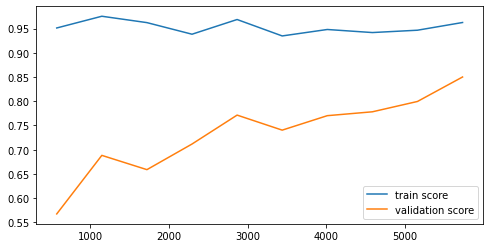

In [75]:
# evolution of accuracy
# comparing X_train and X_test accuracy
show_learning_curve(model_rfc,X_train,y_train,'accuracy')

Cross Validation by KFold 

In [44]:
#  Cross Validation by KFold
from sklearn.model_selection import KFold,cross_val_score
seed=7
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)

model_rfc=RandomForestClassifier(n_estimators=100, random_state=42)
cv_model_rfc=cross_val_score(model_rfc,X_train,y_train,cv=kfold,scoring='accuracy')
print(cv_model_rfc)
#
fit_and_evaluate_model(model_rfc,X_train,X_test,y_train,y_test)

[0.90451275 0.90641361 0.90117801 0.89397906 0.89136126]
[[ 122   10    0   17]
 [   4  259    4   39]
 [   1    7  174   48]
 [   0    2    4 1220]]
              precision    recall  f1-score   support

           1       0.96      0.82      0.88       149
           2       0.93      0.85      0.89       306
           3       0.96      0.76      0.84       230
           4       0.92      1.00      0.96      1226

    accuracy                           0.93      1911
   macro avg       0.94      0.85      0.89      1911
weighted avg       0.93      0.93      0.93      1911



RandomForestClassifier(random_state=42)

In [45]:
# RandomForestClassifier model and without use the specefic preprocessors
model_rfc = RandomForestClassifier(random_state=10)
fit_and_evaluate_model(model_rfc,X_train,X_test,y_train,y_test)

[[ 122    9    0   18]
 [   3  263    3   37]
 [   0   12  173   45]
 [   0    2    5 1219]]
              precision    recall  f1-score   support

           1       0.98      0.82      0.89       149
           2       0.92      0.86      0.89       306
           3       0.96      0.75      0.84       230
           4       0.92      0.99      0.96      1226

    accuracy                           0.93      1911
   macro avg       0.94      0.86      0.89      1911
weighted avg       0.93      0.93      0.93      1911



RandomForestClassifier(random_state=10)

# TMP

In [ ]:
#  Cas1
from sklearn.model_selection import KFold,cross_val_score
seed=7
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)

model11=RandomForestClassifier(n_estimators=10, random_state=10,n_jobs = -1)
print(cross_val_score(model11,X_train,y_train,cv=kfold,scoring='accuracy'))
results=cross_val_score(model11,X_train,y_train,cv=kfold,scoring='accuracy')
print(results.mean()*100)
#
print('\n')
model11.fit(X_train, y_train)
y_pred = model11.predict(X_test)
print(classification_report(y_test, y_pred))

[0.882276   0.85274869 0.8789267  0.87303665 0.875     ]
87.23976078537457


              precision    recall  f1-score   support

           1       0.87      0.78      0.82       149
           2       0.84      0.81      0.82       306
           3       0.87      0.67      0.76       230
           4       0.92      0.97      0.94      1226

    accuracy                           0.90      1911
   macro avg       0.87      0.81      0.84      1911
weighted avg       0.89      0.90      0.89      1911



In [ ]:
#  Cas2
num_trees= 100

model1=RandomForestClassifier(random_state=10,n_jobs = -1)
print(cross_val_score(model1,X_train,y_train,cv=kfold,scoring='accuracy'))
results=cross_val_score(model1,X_train,y_train,cv=kfold,scoring='accuracy')
print(results.mean()*100)
#
print('\n')
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(classification_report(y_test, y_pred))

[0.90385873 0.90445026 0.90510471 0.89659686 0.89790576]
90.15832645639794


              precision    recall  f1-score   support

           1       0.97      0.80      0.88       149
           2       0.91      0.84      0.87       306
           3       0.95      0.73      0.83       230
           4       0.92      0.99      0.95      1226

    accuracy                           0.92      1911
   macro avg       0.94      0.84      0.88      1911
weighted avg       0.92      0.92      0.92      1911



In [ ]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((7641, 140), (1911, 140), (7641,), (1911,))

In [ ]:
#rmclassifier = RandomForestClassifier()
#rmclassifier.fit(X_train,y_train)

In [ ]:
Z=X.isnull().sum().sort_values(ascending=False)
Z

v18q1              7337
v2a1               6859
hogar_mayor           0
parentesco10          0
parentesco11          0
                   ... 
abastaguafuera        0
abastaguadentro       0
cielorazo             0
techootro             0
agesq                 0
Length: 140, dtype: int64

In [ ]:
len(tt),len(tt2)

(66, 44)

In [ ]:
######################## ICIIIIIIIIIIIIIIIIIIIII
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train=X_train[tt]
X_train
#
X_test=X_test[tt]
X_test

In [ ]:
X_train=X_train[tt2]
X_train
#
X_test=X_test[tt2]
X_test

In [ ]:
//==========================SMOTE===========================================

In [ ]:
X_train.shape,y_train.shape

((7641, 44), (7641,))

In [ ]:
####################################
### SMOTE() Operation
####################################

from enum import auto


from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=20) 
#'minority','auto'equivalent à 'not majority','not minority','all'
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 
  
X_train_res.shape,y_train_res.shape

((19060, 66), (19060,))

In [ ]:
sm.get_params()

{'k_neighbors': 5,
 'n_jobs': None,
 'random_state': 20,
 'sampling_strategy': 'auto'}

In [ ]:
sum(y_train_res == 1),sum(y_train_res == 2),sum(y_train_res == 3),sum(y_train_res == 4)

(4765, 4765, 4765, 4765)

In [ ]:
sum(y_train_res == 1)+sum(y_train_res == 2)+sum(y_train_res == 3)+sum(y_train_res == 4)

19060

In [ ]:
# Ici affectation
X_train,y_train=X_train_res, y_train_res

In [ ]:
X_train.shape,y_train.shape

((19060, 66), (19060,))

In [ ]:
#==========================FIN SMOTE===========================================

# Optimization 1

In [46]:
#################################
### function show_importances_plot
#################################
# Only importances > i_threshold
def show_importances_plot(i_model, i_threshold,i_figsize=(11, 6)):
  l_feature_importances_df=pd.DataFrame({'importances': i_model.feature_importances_, 'columns_': i_model.feature_names_in_})
  l_feature_importances_df.sort_values(by=['importances'], ascending=True, inplace=True)
  feature_importances_df_t=l_feature_importances_df[l_feature_importances_df['importances']> i_threshold]
  feature_importances_df_t.set_index('columns_',inplace=True)
  #
  feature_importances_df_t.plot(figsize=i_figsize,kind='barh')
  return l_feature_importances_df

In [47]:
#################################
### get_list_columns_by_threshold
#################################
def get_list_columns_by_threshold(i_feature_importances_df,i_threshold=0.005):
  l_feature_importances_df_t=i_feature_importances_df[i_feature_importances_df.importances > i_threshold]
  return list(l_feature_importances_df_t.columns_)
#


In [48]:
# Initilization
(df,(X_train,X_test,y_train,y_test))=reinit_preprocess_split()

df.shape= (9557, 143)
list columns with Null: []
list_family_no_unique_target()--> []
No numeric in dependency--> []
No numeric in edjefe--> []
No numeric in edjefa--> []
No numeric in idhogar--> []
X_train.shape, X_test.shape,y_train.shape,y_test.shape
(7641, 140) (1911, 140) (7641,) (1911,)


In [49]:
# RandomForestClassifier model and without use the specefic preprocessors
model_rfc = RandomForestClassifier(random_state=0)
fit_and_evaluate_model(model_rfc,X_train,X_test,y_train,y_test)

[[ 123    9    0   17]
 [   3  257    6   40]
 [   0    7  173   50]
 [   0    2    4 1220]]
              precision    recall  f1-score   support

           1       0.98      0.83      0.89       149
           2       0.93      0.84      0.88       306
           3       0.95      0.75      0.84       230
           4       0.92      1.00      0.96      1226

    accuracy                           0.93      1911
   macro avg       0.94      0.85      0.89      1911
weighted avg       0.93      0.93      0.93      1911



RandomForestClassifier(random_state=0)

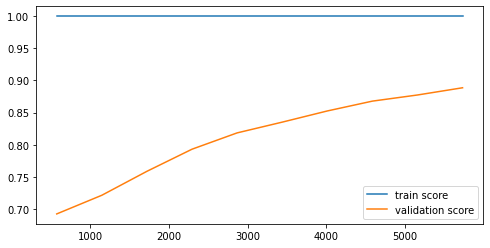

In [52]:
# evolution of accuracy
# comparing X_train and X_test accuracy
show_learning_curve(model_rfc,X_train,y_train,'accuracy')

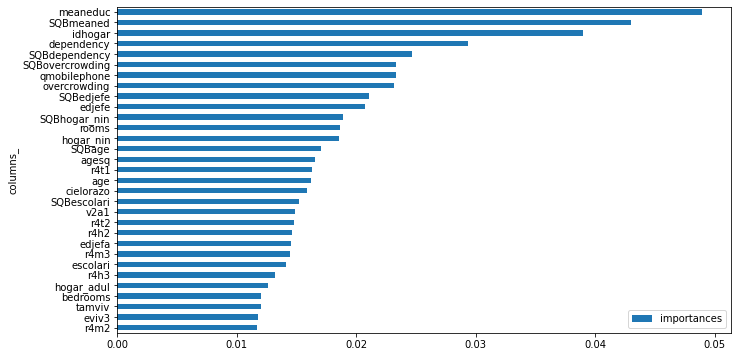

In [53]:
feature_importances_df=show_importances_plot(model_rfc,0.011)

In [54]:
list_cols_importances_0_005=get_list_columns_by_threshold(feature_importances_df,0.005)
len(list_cols_importances_0_005)

64

In [55]:
# Initilization
(df,(X_train,X_test,y_train,y_test))=reinit_preprocess_split()

df.shape= (9557, 143)
list columns with Null: []
list_family_no_unique_target()--> []
No numeric in dependency--> []
No numeric in edjefe--> []
No numeric in edjefa--> []
No numeric in idhogar--> []
X_train.shape, X_test.shape,y_train.shape,y_test.shape
(7641, 140) (1911, 140) (7641,) (1911,)


In [56]:
X_train.shape,X_test.shape

((7641, 140), (1911, 140))

In [57]:
X_train=X_train[list_cols_importances_0_005]
#
X_test=X_test[list_cols_importances_0_005]
#
X_train.shape,X_test.shape

((7641, 64), (1911, 64))

In [59]:
# RandomForestClassifier model
model_rfc = RandomForestClassifier(random_state=0)
fit_and_evaluate_model(model_rfc,X_train,X_test,y_train,y_test)

[[ 129    9    0   11]
 [   5  272    4   25]
 [   0    7  192   31]
 [   0    3    3 1220]]
              precision    recall  f1-score   support

           1       0.96      0.87      0.91       149
           2       0.93      0.89      0.91       306
           3       0.96      0.83      0.90       230
           4       0.95      1.00      0.97      1226

    accuracy                           0.95      1911
   macro avg       0.95      0.90      0.92      1911
weighted avg       0.95      0.95      0.95      1911



RandomForestClassifier(random_state=0)

# Optimization2

In [111]:
# Initilization
(df,(X_train,X_test,y_train,y_test))=reinit_preprocess_split()


df.shape= (9557, 143)
list columns with Null: []
list_family_no_unique_target()--> []
No numeric in dependency--> []
No numeric in edjefe--> []
No numeric in edjefa--> []
No numeric in idhogar--> []
X_train.shape, X_test.shape,y_train.shape,y_test.shape
(7641, 140) (1911, 140) (7641,) (1911,)


In [112]:
X_train=X_train[list_cols_importances_0_005]
#
X_test=X_test[list_cols_importances_0_005]
#
X_train.shape,X_test.shape

((7641, 64), (1911, 64))

In [113]:
# Create correlation matrix
corr_matrix = X_train.corr()
corr_matrix.shape

(64, 64)

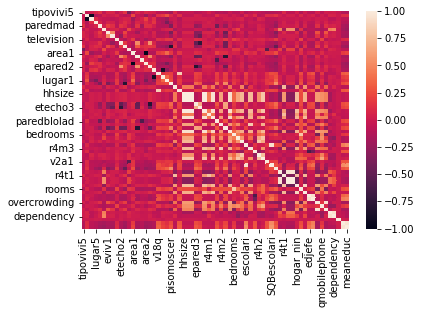

In [114]:
sns.heatmap(corr_matrix)

In [115]:
# looking for features corresponding at the threshold 0.80
cols=corr_matrix.columns
ll1=[]  # for help to filtring
ll2=[]  # columns to keep after filtring
cmpt=0
for col1 in cols:
  for col2 in cols:
    l_val=corr_matrix.loc[col2,col1]
    if cmpt < 10:
      #print (abs(l_val))
      cmpt=cmpt+1
    if abs(l_val) > 0.85:
      if col1!=col2:
        if col1 not in ll2:
          ll1.append(col1)
        ll2.append(col2)
len(ll1),len(ll2)

(16, 54)

In [116]:
# remove duplicates
ll1_unique=list(set(ll1))
ll2_unique=list(set(ll2))
len(ll1_unique),len(ll2_unique)

(11, 27)

In [117]:
# features to eliminate
lst_a_droper=[col for col in ll2_unique if col not in ll1 ]
len(lst_a_droper)

16

In [118]:
# list of features to keep for after
list_cols_above_0_80=[col for col in cols if col not in lst_a_droper]
len(list_cols_above_0_80)

48

filtering features by applying the 0.005 threshold to feature_importances and 0.85 threshold for correlation:

In [119]:
X_train=X_train[list_cols_above_0_80]
#
X_test=X_test[list_cols_above_0_80]
#
X_train.shape,X_test.shape

((7641, 48), (1911, 48))

In [120]:
# RandomForestClassifier model
model_rfc = RandomForestClassifier(random_state=0)
fit_and_evaluate_model(model_rfc,X_train,X_test,y_train,y_test)

[[ 129   10    0   10]
 [   5  276    7   18]
 [   0   12  192   26]
 [   0    2    5 1219]]
              precision    recall  f1-score   support

           1       0.96      0.87      0.91       149
           2       0.92      0.90      0.91       306
           3       0.94      0.83      0.88       230
           4       0.96      0.99      0.98      1226

    accuracy                           0.95      1911
   macro avg       0.95      0.90      0.92      1911
weighted avg       0.95      0.95      0.95      1911



RandomForestClassifier(random_state=0)

In [121]:
# RandomForestClassifier model
model_rfc = RandomForestClassifier(random_state=10)
fit_and_evaluate_model(model_rfc,X_train,X_test,y_train,y_test)

[[ 131   10    0    8]
 [   5  282    7   12]
 [   0   12  192   26]
 [   0    2    5 1219]]
              precision    recall  f1-score   support

           1       0.96      0.88      0.92       149
           2       0.92      0.92      0.92       306
           3       0.94      0.83      0.88       230
           4       0.96      0.99      0.98      1226

    accuracy                           0.95      1911
   macro avg       0.95      0.91      0.93      1911
weighted avg       0.95      0.95      0.95      1911



RandomForestClassifier(random_state=10)

# Optimization 3

In [122]:
# Initilization
(df,(X_train,X_test,y_train,y_test))=reinit_preprocess_split()

df.shape= (9557, 143)
list columns with Null: []
list_family_no_unique_target()--> []
No numeric in dependency--> []
No numeric in edjefe--> []
No numeric in edjefa--> []
No numeric in idhogar--> []
X_train.shape, X_test.shape,y_train.shape,y_test.shape
(7641, 140) (1911, 140) (7641,) (1911,)


Balancing the classes of the dataset by SMOTE approch

In [123]:
####################################
### SMOTE() Operation
####################################

from enum import auto
#
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=20) 
#'minority','auto'equivalent à 'not majority','not minority','all'
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 
  
X_train_res.shape,y_train_res.shape

((19060, 140), (19060,))

In [124]:
sm.get_params()

{'k_neighbors': 5,
 'n_jobs': None,
 'random_state': 20,
 'sampling_strategy': 'auto'}

In [125]:
sum(y_train_res == 1),sum(y_train_res == 2),sum(y_train_res == 3),sum(y_train_res == 4)

(4765, 4765, 4765, 4765)

In [126]:
# affectation
X_train,y_train=X_train_res, y_train_res

In [127]:
X_train.shape,y_train.shape

((19060, 140), (19060,))

In [128]:
#=============================================
# Case Optimiozation1
X_train=X_train[list_cols_importances_0_005]
#
X_test=X_test[list_cols_importances_0_005]
#
X_train.shape,X_test.shape
#=============================================
#
# RandomForestClassifier model
#model_rfc = RandomForestClassifier(random_state=0)
#fit_and_evaluate_model(model_rfc,X_train,X_test,y_train,y_test)

((19060, 64), (1911, 64))

In [129]:
#=============================================
# Case2 Optimization2
X_train=X_train[list_cols_above_0_80]
#
X_test=X_test[list_cols_above_0_80]
#
X_train.shape,X_test.shape
#=============================================
#

((19060, 48), (1911, 48))

In [130]:
# RandomForestClassifier model
model_rfc = RandomForestClassifier(random_state=0)
fit_and_evaluate_model(model_rfc,X_train,X_test,y_train,y_test)

[[ 135    7    1    6]
 [   5  278    7   16]
 [   0   13  200   17]
 [   3    3    6 1214]]
              precision    recall  f1-score   support

           1       0.94      0.91      0.92       149
           2       0.92      0.91      0.92       306
           3       0.93      0.87      0.90       230
           4       0.97      0.99      0.98      1226

    accuracy                           0.96      1911
   macro avg       0.94      0.92      0.93      1911
weighted avg       0.96      0.96      0.96      1911



RandomForestClassifier(random_state=0)

In [134]:
model_rfc = RandomForestClassifier(random_state=10)
fit_and_evaluate_model(model_rfc,X_train,X_test,y_train,y_test)

[[ 134    8    0    7]
 [   6  277    8   15]
 [   0   15  200   15]
 [   4    3    6 1213]]
              precision    recall  f1-score   support

           1       0.93      0.90      0.91       149
           2       0.91      0.91      0.91       306
           3       0.93      0.87      0.90       230
           4       0.97      0.99      0.98      1226

    accuracy                           0.95      1911
   macro avg       0.94      0.92      0.93      1911
weighted avg       0.95      0.95      0.95      1911



RandomForestClassifier(random_state=10)

# Optimization4

In [135]:
# Initilization
(df,(X_train,X_test,y_train,y_test))=reinit_preprocess_split()

df.shape= (9557, 143)
list columns with Null: []
list_family_no_unique_target()--> []
No numeric in dependency--> []
No numeric in edjefe--> []
No numeric in edjefa--> []
No numeric in idhogar--> []
X_train.shape, X_test.shape,y_train.shape,y_test.shape
(7641, 140) (1911, 140) (7641,) (1911,)


In [136]:
# SMOTE
sm = SMOTE(random_state=20) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape,y_train_res.shape

((19060, 140), (19060,))

In [137]:
# here assignment
X_train,y_train=X_train_res, y_train_res
#
#=============================================
# Apply the threshold 0_005 for features_imprtances
X_train=X_train[list_cols_importances_0_005]
#
X_test=X_test[list_cols_importances_0_005]
#
X_train.shape,X_test.shape
#=============================================
#=============================================
# Apply the threshold 0_85 for the correlation
X_train=X_train[list_cols_above_0_80]
#
X_test=X_test[list_cols_above_0_80]
#
X_train.shape,X_test.shape
#=============================================

((19060, 48), (1911, 48))

In [138]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

#
rfc=RandomForestClassifier(bootstrap=True, class_weight=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0, 
                                    min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0, n_estimators=0, n_jobs=2,
                                            oob_score=False, random_state=0, verbose=0, warm_start=False)

tuned_parameters={'n_estimators': [200,300,400], 'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [32,64], 'criterion': ['gini', 'entropy']}

#
CV_rfc=RandomizedSearchCV(cv=5, error_score='raise', estimator=rfc, param_distributions=tuned_parameters,n_jobs=2,
                                   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',   
                                       scoring=None, verbose=0)
 
#
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_
#
fit_and_evaluate_model(CV_rfc,X_train,X_test,y_train,y_test)

[[ 135    8    0    6]
 [   5  276    8   17]
 [   0   13  201   16]
 [   0    3    7 1216]]
              precision    recall  f1-score   support

           1       0.96      0.91      0.93       149
           2       0.92      0.90      0.91       306
           3       0.93      0.87      0.90       230
           4       0.97      0.99      0.98      1226

    accuracy                           0.96      1911
   macro avg       0.95      0.92      0.93      1911
weighted avg       0.96      0.96      0.96      1911



RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(n_estimators=0, n_jobs=2,
                                                    random_state=0),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [32, 64],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 300, 400]},
                   return_train_score='warn')

In [140]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 32,
 'max_features': 'log2',
 'n_estimators': 400}

In [345]:
# GridSearchCV 
from sklearn.model_selection import GridSearchCV

#
rfc=RandomForestClassifier(bootstrap=True, class_weight=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0, 
                                    min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                                            oob_score=False, random_state=10, verbose=0, warm_start=False)

tuned_parameters={'n_estimators': [200,300,400], 'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [32,64], 'criterion': ['gini', 'entropy']}

#
CV_rfc=GridSearchCV(cv=5, error_score='raise', estimator=rfc, param_grid=tuned_parameters,n_jobs=2,
                                   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',   
                                       scoring=None, verbose=0)
 
#
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_
#
fit_and_evaluate_model(CV_rfc,X_train,X_test,y_train,y_test)



[[ 133    9    0    7]
 [   6  277    9   14]
 [   1   14  198   17]
 [   0    5    8 1213]]
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       149
           2       0.91      0.91      0.91       306
           3       0.92      0.86      0.89       230
           4       0.97      0.99      0.98      1226

    accuracy                           0.95      1911
   macro avg       0.94      0.91      0.92      1911
weighted avg       0.95      0.95      0.95      1911



GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(n_jobs=2, random_state=10),
             n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [32, 64],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 400]},
             return_train_score='warn')

In [139]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 32,
 'max_features': 'log2',
 'n_estimators': 400}

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 32,
 'max_features': 'auto',
 'n_estimators': 300}

In [ ]:
print(CV_rfc.best_params_)
y_pred = CV_rfc.predict(X_test)
print(classification_report(y_test, y_pred))

{'criterion': 'gini', 'max_depth': 32, 'max_features': 'auto', 'n_estimators': 400}
              precision    recall  f1-score   support

           1       0.95      0.91      0.93       149
           2       0.92      0.90      0.91       306
           3       0.94      0.89      0.91       230
           4       0.97      0.99      0.98      1226

    accuracy                           0.96      1911
   macro avg       0.95      0.92      0.93      1911
weighted avg       0.96      0.96      0.96      1911



In [236]:
model_1 = RandomForestClassifier(random_state=10,n_estimators=400,
                    max_features='auto',criterion='gini', max_depth=32)
fit_and_evaluate_model(model_1,X_train,X_test,y_train,y_test)

[[ 135    8    0    6]
 [   5  276    7   18]
 [   2   14  198   16]
 [   2    4    6 1214]]
              precision    recall  f1-score   support

           1       0.94      0.91      0.92       149
           2       0.91      0.90      0.91       306
           3       0.94      0.86      0.90       230
           4       0.97      0.99      0.98      1226

    accuracy                           0.95      1911
   macro avg       0.94      0.91      0.93      1911
weighted avg       0.95      0.95      0.95      1911



RandomForestClassifier(max_depth=32, n_estimators=400, random_state=10)

In [338]:
model_1 = RandomForestClassifier(random_state=10,n_estimators=300,
                    max_features='auto',criterion='gini', max_depth=32)
fit_and_evaluate_model(model_1,X_train,X_test,y_train,y_test)

[[ 135    8    0    6]
 [   6  277    9   14]
 [   1   16  198   15]
 [   1    5    7 1213]]
              precision    recall  f1-score   support

           1       0.94      0.91      0.92       149
           2       0.91      0.91      0.91       306
           3       0.93      0.86      0.89       230
           4       0.97      0.99      0.98      1226

    accuracy                           0.95      1911
   macro avg       0.94      0.92      0.93      1911
weighted avg       0.95      0.95      0.95      1911



RandomForestClassifier(max_depth=32, n_estimators=300, random_state=10)

In [238]:
model_1 = RandomForestClassifier(random_state=10,n_estimators=500,
                    max_features='auto',criterion='gini', max_depth=32)
fit_and_evaluate_model(model_1,X_train,X_test,y_train,y_test)

[[ 135    8    0    6]
 [   5  277    7   17]
 [   2   14  198   16]
 [   2    4    6 1214]]
              precision    recall  f1-score   support

           1       0.94      0.91      0.92       149
           2       0.91      0.91      0.91       306
           3       0.94      0.86      0.90       230
           4       0.97      0.99      0.98      1226

    accuracy                           0.95      1911
   macro avg       0.94      0.92      0.93      1911
weighted avg       0.95      0.95      0.95      1911



RandomForestClassifier(max_depth=32, n_estimators=500, random_state=10)

In [ ]:
#  Cas3 n_estimators=100
i_n_estimator=100
from sklearn.model_selection import KFold,cross_val_score
seed=7
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)
#
model_1=RandomForestClassifier(n_estimators=i_n_estimator, random_state=10)
c_v_score= cross_val_score(model_1,X_train,y_train,cv=kfold,scoring='accuracy')
#
print(c_v_score.mean()*100)
#
print('\n')
fit_and_evaluate_model(model_1,X_train,X_test,y_train,y_test)

94.69045120671564


[[ 136    8    0    5]
 [   5  276   10   15]
 [   0   17  200   13]
 [   3    2    7 1214]]
              precision    recall  f1-score   support

           1       0.94      0.91      0.93       149
           2       0.91      0.90      0.91       306
           3       0.92      0.87      0.89       230
           4       0.97      0.99      0.98      1226

    accuracy                           0.96      1911
   macro avg       0.94      0.92      0.93      1911
weighted avg       0.95      0.96      0.96      1911



RandomForestClassifier(random_state=10)

In [ ]:
#  Cas3 n_estimators=100
i_n_estimator=100
from sklearn.model_selection import KFold,cross_val_score
seed=7
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)
#
model_1=RandomForestClassifier(n_estimators=i_n_estimator, random_state=100)
c_v_score= cross_val_score(model_1,X_train,y_train,cv=kfold,scoring='accuracy')
#
print(c_v_score.mean())
#
print('\n')
fit_and_evaluate_model(model_1,X_train,X_test,y_train,y_test)

94.43336831059813


[[ 135    8    0    6]
 [   8  269    8   21]
 [   0   13  203   14]
 [   0    3    5 1218]]
              precision    recall  f1-score   support

           1       0.94      0.91      0.92       149
           2       0.92      0.88      0.90       306
           3       0.94      0.88      0.91       230
           4       0.97      0.99      0.98      1226

    accuracy                           0.95      1911
   macro avg       0.94      0.92      0.93      1911
weighted avg       0.95      0.95      0.95      1911



RandomForestClassifier(random_state=100)

In [ ]:
#  Cas3 n_estimators=100
i_n_estimator=100
from sklearn.model_selection import KFold,cross_val_score
seed=42
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)
#
model_1 = RandomForestClassifier(random_state=100,n_estimators=400,
                    max_features='auto',criterion='gini', max_depth=32)
#
c_v_score= cross_val_score(model_1,X_train,y_train,cv=kfold,scoring='accuracy')
#
print(c_v_score.mean())
#
print('\n')
fit_and_evaluate_model(model_1,X_train,X_test,y_train,y_test)


0.9472717733473243


[[ 134    8    0    7]
 [   5  271   10   20]
 [   0   12  205   13]
 [   2    3    8 1213]]
              precision    recall  f1-score   support

           1       0.95      0.90      0.92       149
           2       0.92      0.89      0.90       306
           3       0.92      0.89      0.91       230
           4       0.97      0.99      0.98      1226

    accuracy                           0.95      1911
   macro avg       0.94      0.92      0.93      1911
weighted avg       0.95      0.95      0.95      1911



RandomForestClassifier(max_depth=32, n_estimators=400, random_state=100)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#
rfc=RandomForestClassifier(bootstrap=True, class_weight=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0, 
                                    min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                                            oob_score=False, random_state=0, verbose=0, warm_start=False)

tuned_parameters={'n_estimators': [200,300,400], 'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [32,64], 'criterion': ['gini', 'entropy']}

#
CV_rfc=RandomizedSearchCV(cv=5, error_score='raise', estimator=rfc, param_distributions=tuned_parameters,n_jobs=2,
                                   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',   
                                       scoring=None, verbose=0)
 
#
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_
#
fit_and_evaluate_model(CV_rfc,X_train,X_test,y_train,y_test)

[[ 123    9    0   17]
 [   3  262    5   36]
 [   0   10  180   40]
 [   1    1    5 1219]]
              precision    recall  f1-score   support

           1       0.97      0.83      0.89       149
           2       0.93      0.86      0.89       306
           3       0.95      0.78      0.86       230
           4       0.93      0.99      0.96      1226

    accuracy                           0.93      1911
   macro avg       0.94      0.86      0.90      1911
weighted avg       0.93      0.93      0.93      1911



RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(n_estimators=10, n_jobs=2,
                                                    random_state=0),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [32, 64],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 300, 400]},
                   return_train_score='warn')

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 32,
 'max_features': 'auto',
 'n_estimators': 400}